In [1]:
#importing my packages
import patatmo
import pandas
import time
import os
import datetime
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

In [156]:
#raed the file with the data from all the stations for the year 2019
data_2019 = pd.read_csv('data_2019.csv')

In [3]:
#here I specify the study period of the whole year 2019
datums = pd.date_range(start='2019-01-01', end='2019-12-31')
datums = datums.astype(str)

In [4]:
#in this for loop I check per station if they miss one day from the study period. If that is the case, the station is added to the foutieve list I specify below.
#the stations from the foutieve list and their data are removed from the dataset used for the annual analysis
foutieve_stations = []
for station in data_2019.station_id.unique():
    timelist = data_2019[data_2019['station_id'] == station].time.str[:10].unique()
    for datum in datums:
        if datum not in timelist:
            print(station, 'is missing day',datum)
            foutieve_stations.append(station)
            data_2019 = data_2019[data_2019['station_id'] != station]
            break

70:ee:50:00:04:b2 is missing day 2019-01-01
70:ee:50:00:38:bc is missing day 2019-06-04
70:ee:50:00:3f:bc is missing day 2019-01-01
70:ee:50:00:51:30 is missing day 2019-01-01
70:ee:50:00:c8:74 is missing day 2019-01-01
70:ee:50:00:cf:52 is missing day 2019-05-31
70:ee:50:00:db:94 is missing day 2019-11-07
70:ee:50:00:df:8a is missing day 2019-10-05
70:ee:50:00:ec:0a is missing day 2019-10-24
70:ee:50:00:f7:ac is missing day 2019-05-19
70:ee:50:01:77:de is missing day 2019-02-24
70:ee:50:01:95:a4 is missing day 2019-01-01
70:ee:50:01:b2:94 is missing day 2019-01-01
70:ee:50:01:ce:b2 is missing day 2019-01-01
70:ee:50:01:d5:fa is missing day 2019-01-01
70:ee:50:02:46:56 is missing day 2019-01-15
70:ee:50:02:7c:9e is missing day 2019-01-04
70:ee:50:02:87:80 is missing day 2019-03-19
70:ee:50:02:92:94 is missing day 2019-01-01
70:ee:50:02:93:6c is missing day 2019-09-08
70:ee:50:02:93:b8 is missing day 2019-03-26
70:ee:50:02:9d:ee is missing day 2019-07-06
70:ee:50:02:a5:12 is missing day

70:ee:50:52:c2:38 is missing day 2019-01-01
70:ee:50:52:c4:c8 is missing day 2019-01-01
70:ee:50:52:ca:fa is missing day 2019-01-01
70:ee:50:52:eb:58 is missing day 2019-01-01
70:ee:50:53:0f:2c is missing day 2019-01-01
70:ee:50:53:1b:e8 is missing day 2019-01-01
70:ee:50:53:23:1e is missing day 2019-01-01
70:ee:50:53:32:d8 is missing day 2019-01-01
70:ee:50:53:3a:6a is missing day 2019-01-01
70:ee:50:53:45:f0 is missing day 2019-01-01
70:ee:50:5e:fb:0a is missing day 2019-01-01


In [5]:
data_2019.to_csv(os.getcwd() + "\datacleaned2019.csv")

In [3]:
data2019 = pd.read_csv('datacleaned2019.csv',index_col='time',parse_dates=['time'] )

In [4]:
#resampling to hourly data for a later analysis
data_H = data2019.groupby('station_id').resample('H').mean()
data_H_grp = data_H.reset_index().groupby('station_id')

In [18]:
#resampling the data to daily data to plot it to check for outliers 
data_D = data2019.groupby('station_id').resample('D').mean()
data_D_grp = data_D.reset_index().groupby('station_id')

Text(0, 0.5, 'Temperature ($^\\circ$C)')

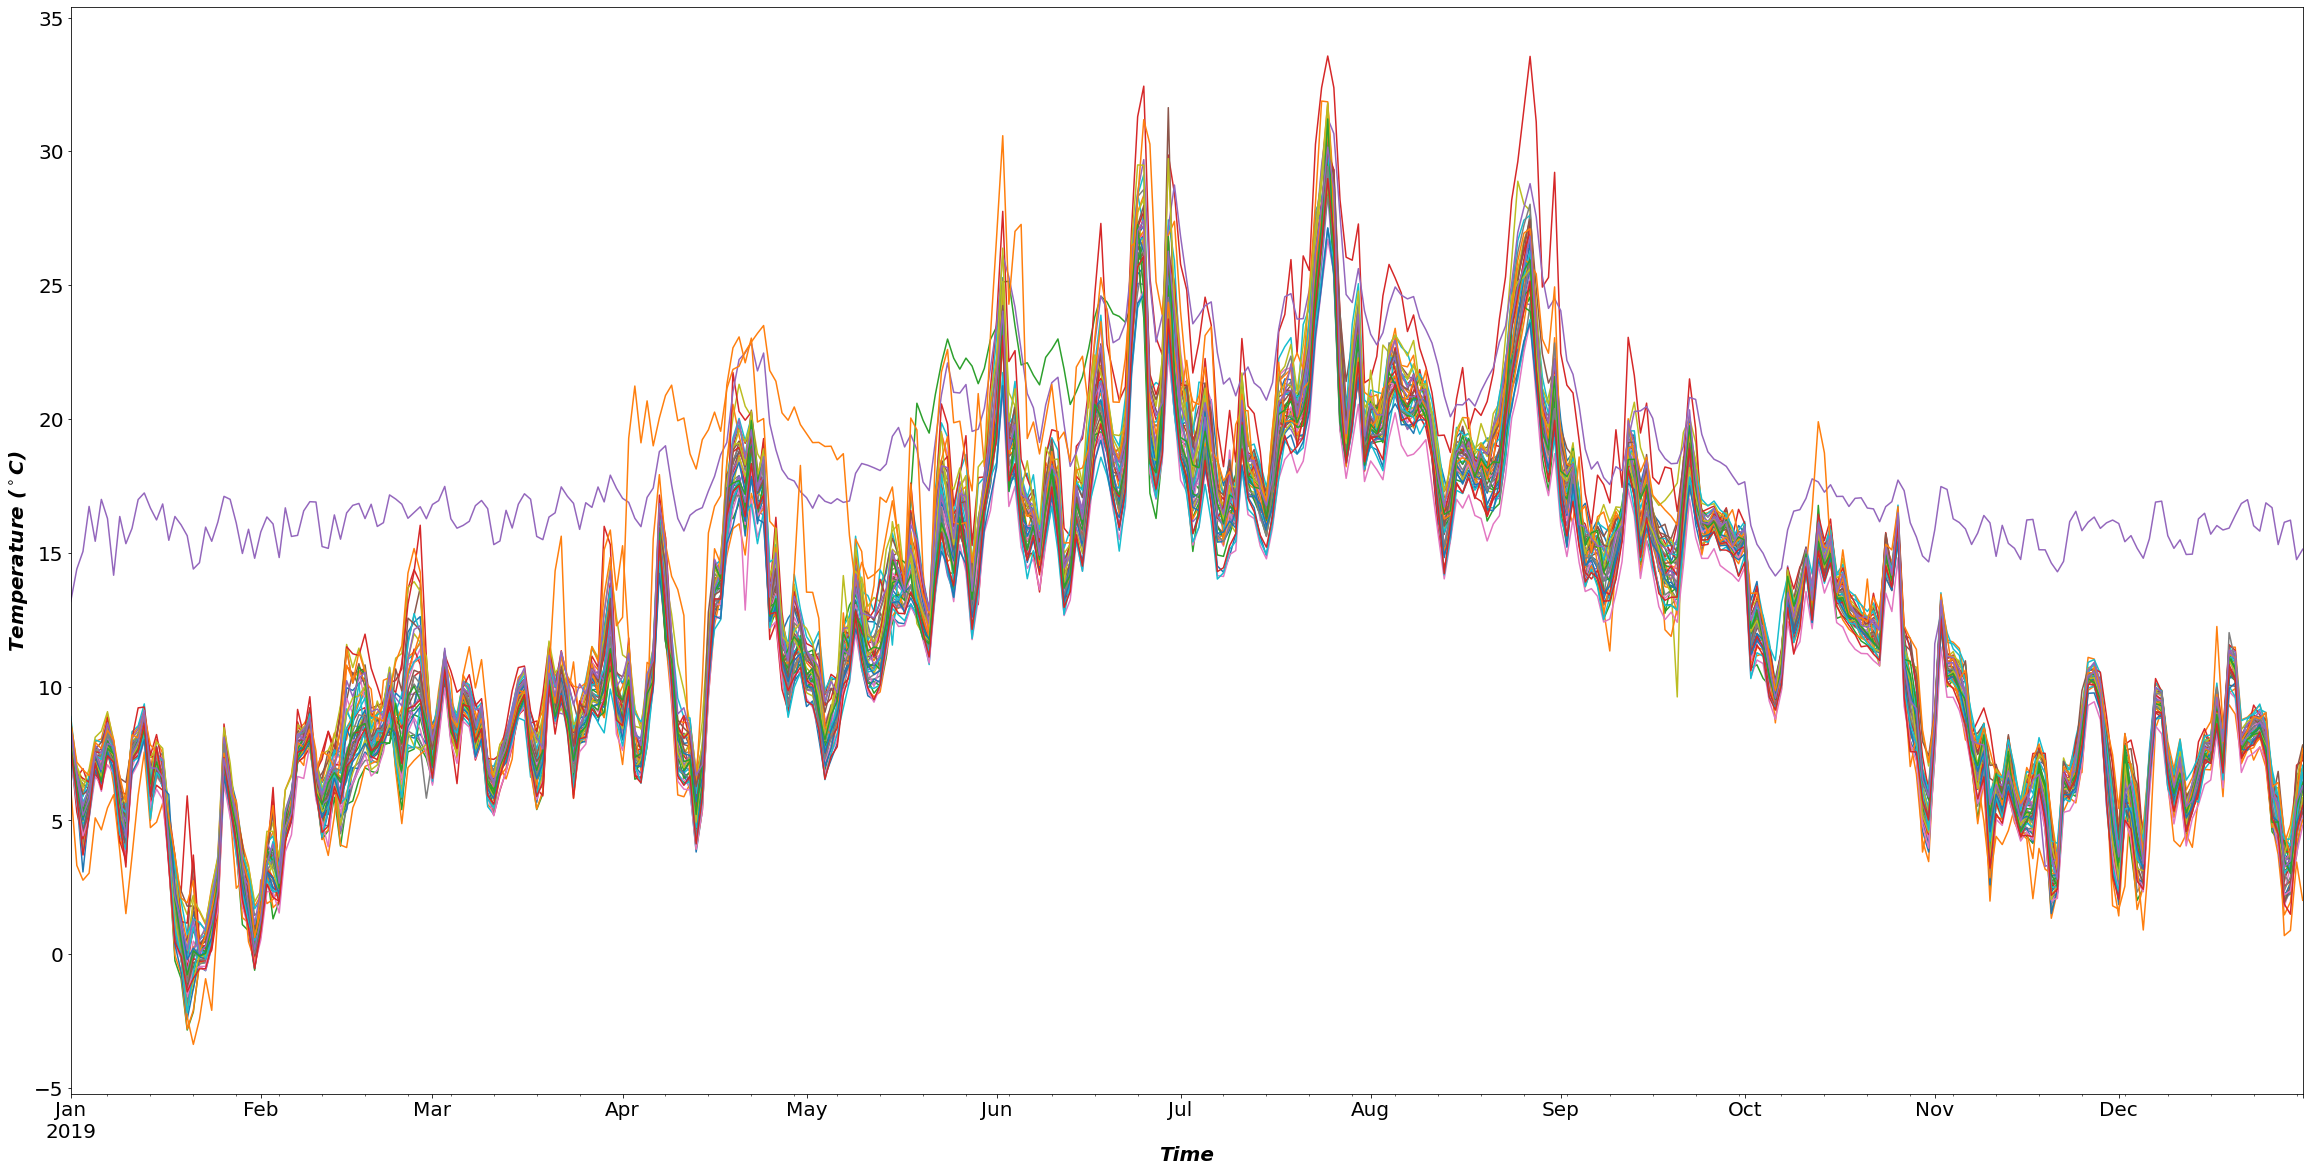

In [19]:
#plotting the daily data
fig, ax = plt.subplots(figsize=(40,20))
data_D_grp.plot(x='time',y='Temperature',ax=ax,legend=False)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Time',fontsize=20, weight='bold', fontstyle='oblique')
plt.ylabel('Temperature ($^\circ$C)', fontsize=20, weight='bold', fontstyle='oblique')

In [8]:
data_dropped_columns = data2019.drop([ 'CO2', 'Pressure', 'Noise', 'Rain', 'WindStrength', 'WindAngle', 'GustStrength', 'GustAngle'], axis=1) 

In [9]:
#checking how many stations are left 
countstations = data_dropped_columns.station_id.unique()
print(len(countstations))

45


In [11]:
test_nanvalues = data_dropped_columns.reset_index().groupby('station_id')

In [12]:
#testing if the dataset contains any nan values per station id
nanvalue = 0
for i in test_nanvalues:
    print('calculating for group:', i[0])
    invalid = False
    for j, (t_grp) in enumerate(zip(i[1].Temperature)):
        if t_grp != t_grp:
            print(t_grp)
            nanvalue+=1
print(nanvalue)

calculating for group: 70:ee:50:00:0a:3e
calculating for group: 70:ee:50:00:49:5e
calculating for group: 70:ee:50:00:6b:e6
calculating for group: 70:ee:50:01:00:34
calculating for group: 70:ee:50:01:49:a0
calculating for group: 70:ee:50:01:b1:6a
calculating for group: 70:ee:50:02:90:a4
calculating for group: 70:ee:50:02:9d:0e
calculating for group: 70:ee:50:02:b7:b8
calculating for group: 70:ee:50:02:fc:b6
calculating for group: 70:ee:50:03:60:90
calculating for group: 70:ee:50:03:bd:3e
calculating for group: 70:ee:50:03:bf:b4
calculating for group: 70:ee:50:03:c9:66
calculating for group: 70:ee:50:03:f9:6e
calculating for group: 70:ee:50:04:8f:54
calculating for group: 70:ee:50:12:4d:42
calculating for group: 70:ee:50:12:71:02
calculating for group: 70:ee:50:12:76:08
calculating for group: 70:ee:50:12:a9:cc
calculating for group: 70:ee:50:12:ba:5e
calculating for group: 70:ee:50:12:d7:fa
calculating for group: 70:ee:50:12:e8:f0
calculating for group: 70:ee:50:13:02:2a
calculating for 

In [15]:
#resampling the data again, but not grouping it by ID this time so I can use it to calculate the st dev
mean_hourly_2019 = data_dropped_columns.Temperature.resample('H').mean()
mean_hourly_2019_grp = mean_hourly_2019.reset_index()
mean_hourly_2019_grp

time  Temperature
0    2019-01-01 00:00:00+00:00     8.872587
1    2019-01-01 01:00:00+00:00     8.875391
2    2019-01-01 02:00:00+00:00     8.856117
3    2019-01-01 03:00:00+00:00     8.691188
4    2019-01-01 04:00:00+00:00     8.465192
...                        ...          ...
8755 2019-12-31 19:00:00+00:00     4.785551
8756 2019-12-31 20:00:00+00:00     5.016248
8757 2019-12-31 21:00:00+00:00     4.952930
8758 2019-12-31 22:00:00+00:00     4.505336
8759 2019-12-31 23:00:00+00:00     4.239089

[8760 rows x 2 columns]

In [17]:
#calculating the st dev
import statistics 

stdevmeans = statistics.stdev(mean_hourly_2019_grp.Temperature)
stdevmeans

6.349908143661271

In [22]:
#executing the three sigma method on the dataset and remvoing the stations that violate the rule

outliers = 0 #counts the amount of outliers
verwijder = 0 #counts the amount of stations that are removed, basically a chceck if all outlier stations are removed
for i in data_H_grp:
    print('calculating for group:', i[0]) #it checks every station in the dataset for outlier values
    invalid = False
    for j, (t_grp, t_ref) in enumerate(zip(i[1].Temperature, mean_hourly_2019_grp.Temperature)):
        if abs((t_grp - t_ref)/stdevmeans) > 3:   #the 3-sigma method          
            outliers+=1 
            invalid = True
            print('outlier found in group:', i[0]) #prints the station id that contains an outlier
            break
    if invalid:
        verwijder+=1
        data_dropped_columns = data_dropped_columns[data_dropped_columns['station_id'] != i[0]] #removes the station with outlier
print(outliers) 
print(verwijder)

calculating for group: 70:ee:50:00:0a:3e
calculating for group: 70:ee:50:00:49:5e
calculating for group: 70:ee:50:00:6b:e6
calculating for group: 70:ee:50:01:00:34
calculating for group: 70:ee:50:01:49:a0
calculating for group: 70:ee:50:01:b1:6a
calculating for group: 70:ee:50:02:90:a4
calculating for group: 70:ee:50:02:9d:0e
calculating for group: 70:ee:50:02:b7:b8
calculating for group: 70:ee:50:02:fc:b6
calculating for group: 70:ee:50:03:60:90
calculating for group: 70:ee:50:03:bd:3e
calculating for group: 70:ee:50:03:bf:b4
calculating for group: 70:ee:50:03:c9:66
calculating for group: 70:ee:50:03:f9:6e
calculating for group: 70:ee:50:04:8f:54
calculating for group: 70:ee:50:12:4d:42
calculating for group: 70:ee:50:12:71:02
calculating for group: 70:ee:50:12:76:08
calculating for group: 70:ee:50:12:a9:cc
calculating for group: 70:ee:50:12:ba:5e
calculating for group: 70:ee:50:12:d7:fa
calculating for group: 70:ee:50:12:e8:f0
outlier found in group: 70:ee:50:12:e8:f0
calculating for

In [25]:
data_daily = data_dropped_columns.groupby('station_id').resample('D').mean()
data_daily_grp = data_daily.reset_index().groupby('station_id')

Text(0, 0.5, 'Temperature ($^\\circ$C)')

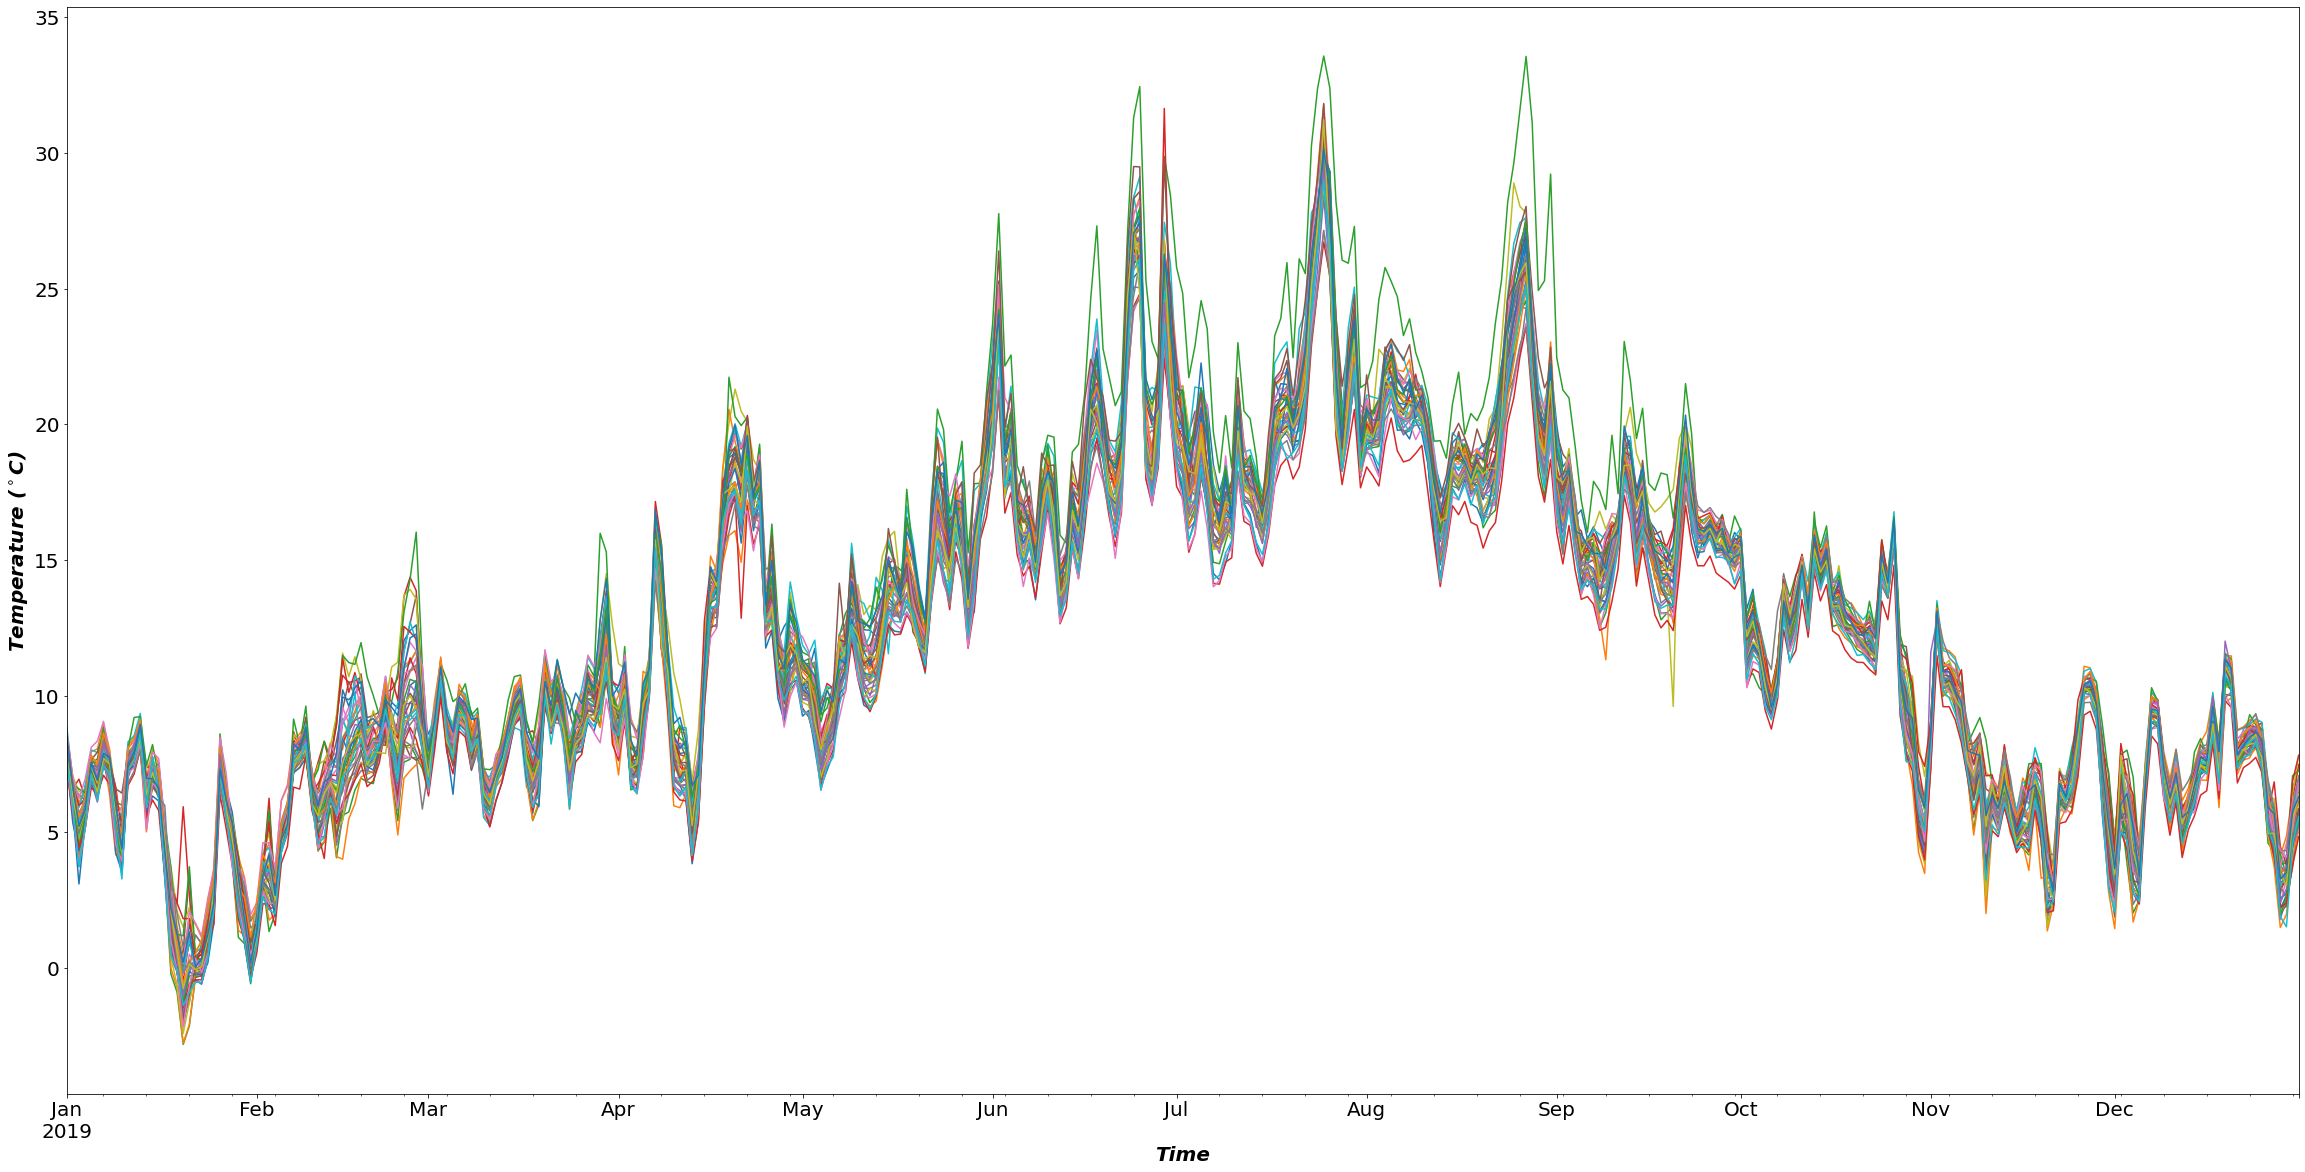

In [26]:
fig, ax = plt.subplots(figsize=(40,20))
data_daily_grp.plot(x='time',y='Temperature',ax=ax,legend=False)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Time',fontsize=20, weight='bold', fontstyle='oblique')
plt.ylabel('Temperature ($^\circ$C)', fontsize=20, weight='bold', fontstyle='oblique')

In [28]:
#reading the reference statoin data 
os.chdir('C:\\Users\donna\\')
referencestation = pd.read_csv('referentiestation.csv')

In [31]:
#this for loop removes stations from the dataset that differ more than 12 degrees on the daily averages
verwijder = 0
for i in data_daily_grp:
    print('calculating for group:', i[0])
    invalid = False
    for j, (t_grp, t_ref) in enumerate(zip(i[1].Temperature, referencestation.Temperature)):
        if abs(t_grp - t_ref) > 12:            
            outliers+=1 
            invalid = True
            print('outlier found in group:', i[0])
            break
    if invalid:
        verwijder+=1
        data_dropped_columns = data_dropped_columns[data_dropped_columns['station_id'] != i[0]]
print(verwijder)

calculating for group: 70:ee:50:00:0a:3e
calculating for group: 70:ee:50:00:49:5e
calculating for group: 70:ee:50:00:6b:e6
calculating for group: 70:ee:50:01:00:34
calculating for group: 70:ee:50:01:49:a0
calculating for group: 70:ee:50:01:b1:6a
calculating for group: 70:ee:50:02:90:a4
calculating for group: 70:ee:50:02:9d:0e
calculating for group: 70:ee:50:02:b7:b8
calculating for group: 70:ee:50:02:fc:b6
calculating for group: 70:ee:50:03:60:90
calculating for group: 70:ee:50:03:bd:3e
calculating for group: 70:ee:50:03:bf:b4
calculating for group: 70:ee:50:03:c9:66
calculating for group: 70:ee:50:03:f9:6e
calculating for group: 70:ee:50:04:8f:54
calculating for group: 70:ee:50:12:4d:42
calculating for group: 70:ee:50:12:71:02
calculating for group: 70:ee:50:12:76:08
calculating for group: 70:ee:50:12:a9:cc
calculating for group: 70:ee:50:12:ba:5e
calculating for group: 70:ee:50:12:d7:fa
calculating for group: 70:ee:50:13:02:2a
calculating for group: 70:ee:50:13:4c:28
calculating for 

In [32]:
#checking how many stations are left 
countstations = data_dropped_columns.station_id.unique()
print(len(countstations))

41


In [33]:
#creating a geodataframe in order to plot the locations of the staions left for the annual analysis
gdf = gpd.GeoDataFrame(data_dropped_columns, geometry=gpd.points_from_xy(x=data_dropped_columns['longitude'], y=data_dropped_columns['latitude']))
gdf.crs = {'init': 'epsg:4326'}

C:\Users\donna\anaconda3\envs\bep\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


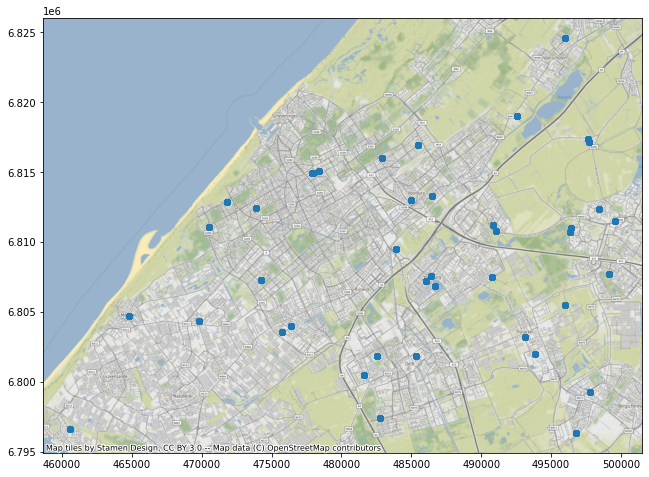

In [34]:
#visualizing the geodataframe
ax = gdf.to_crs(epsg=3857).plot(figsize=(18,8))
ctx.add_basemap(ax=ax)

In [54]:
data_dropped_columns.to_csv(os.getcwd() + "\datacleaned2019_2.csv")

In [46]:
data_cleaned_2 = pd.read_csv('datacleaned2019_2.csv')

In [49]:
datacleaned2 = pd.read_csv('datacleaned2019_2.csv',index_col='time',parse_dates=['time'] )

In [50]:
data_H_2 = datacleaned2.groupby('station_id').resample('H').mean()
data_H_grp_2 = data_H_2.reset_index().groupby('station_id')

In [58]:
data_daily = datacleaned2.groupby('station_id').resample('D').mean()
data_daily_grp = data_daily.reset_index().groupby('station_id')

In [59]:
#extracting the temperature values of the rural site 
ruraltemp = data_daily_grp.get_group('70:ee:50:03:60:90')
ruraltemp.Temperature

3650    7.676208
3651    5.797509
3652    3.077519
3653    5.297251
3654    7.041404
          ...   
4010    4.383916
4011    2.193567
4012    2.238934
4013    4.603873
4014    5.237801
Name: Temperature, Length: 365, dtype: float64

In [75]:
#substracting every temperature value with the rural temperature value. This results in thedaily UHI values, which are saved in a seperate list 
uhimeandaily = []
for i in data_daily_grp:
    for j, (t_grp, t_rural) in enumerate(zip(i[1].Temperature, ruraltemp.Temperature)):
        value = t_grp- t_rural
        uhimeandaily.append(value)

In [94]:
#finding the maximum UHI value over all stations for the entire year
print(dailydata[dailydata.uhimeandaily == dailydata.uhimeandaily.max()]) 

             station_id                      time  Unnamed: 0  Unnamed: 0.1  \
8269  70:ee:50:13:02:2a 2019-08-28 00:00:00+00:00   8470293.5       68221.5   

      Temperature   Humidity   latitude  longitude    year  month   day  \
8269    31.103704  47.162963  52.009698   4.334786  2019.0    8.0  28.0   

      uhimeandaily  
8269        9.1623  


In [155]:
#finding the mean UHI over all stations for the entire year
dailydata.uhimeandaily.mean()

0.7724051125603656

In [78]:
dailydata = data_daily.reset_index()

In [79]:
#the UHImeandaily list is added to the dataframe 
dailydata['uhimeandaily'] = uhimeandaily

In [105]:
#correlation tests
print(dailydata['uhimeandaily'].corr(dailydata['Humidity']))
print(dailydata['Temperature'].corr(dailydata['Humidity']))
print(dailydata['Temperature'].corr(dailydata['uhimeandaily']))

-0.5327355745075163
-0.5813710814613438
0.28297572723212294


In [80]:
#the data is grouped by station ID in order to plot it 
groupeddaily = dailydata.groupby('station_id')

Text(0, 0.5, 'Urban Heat Island effect ($^\\circ$C)')

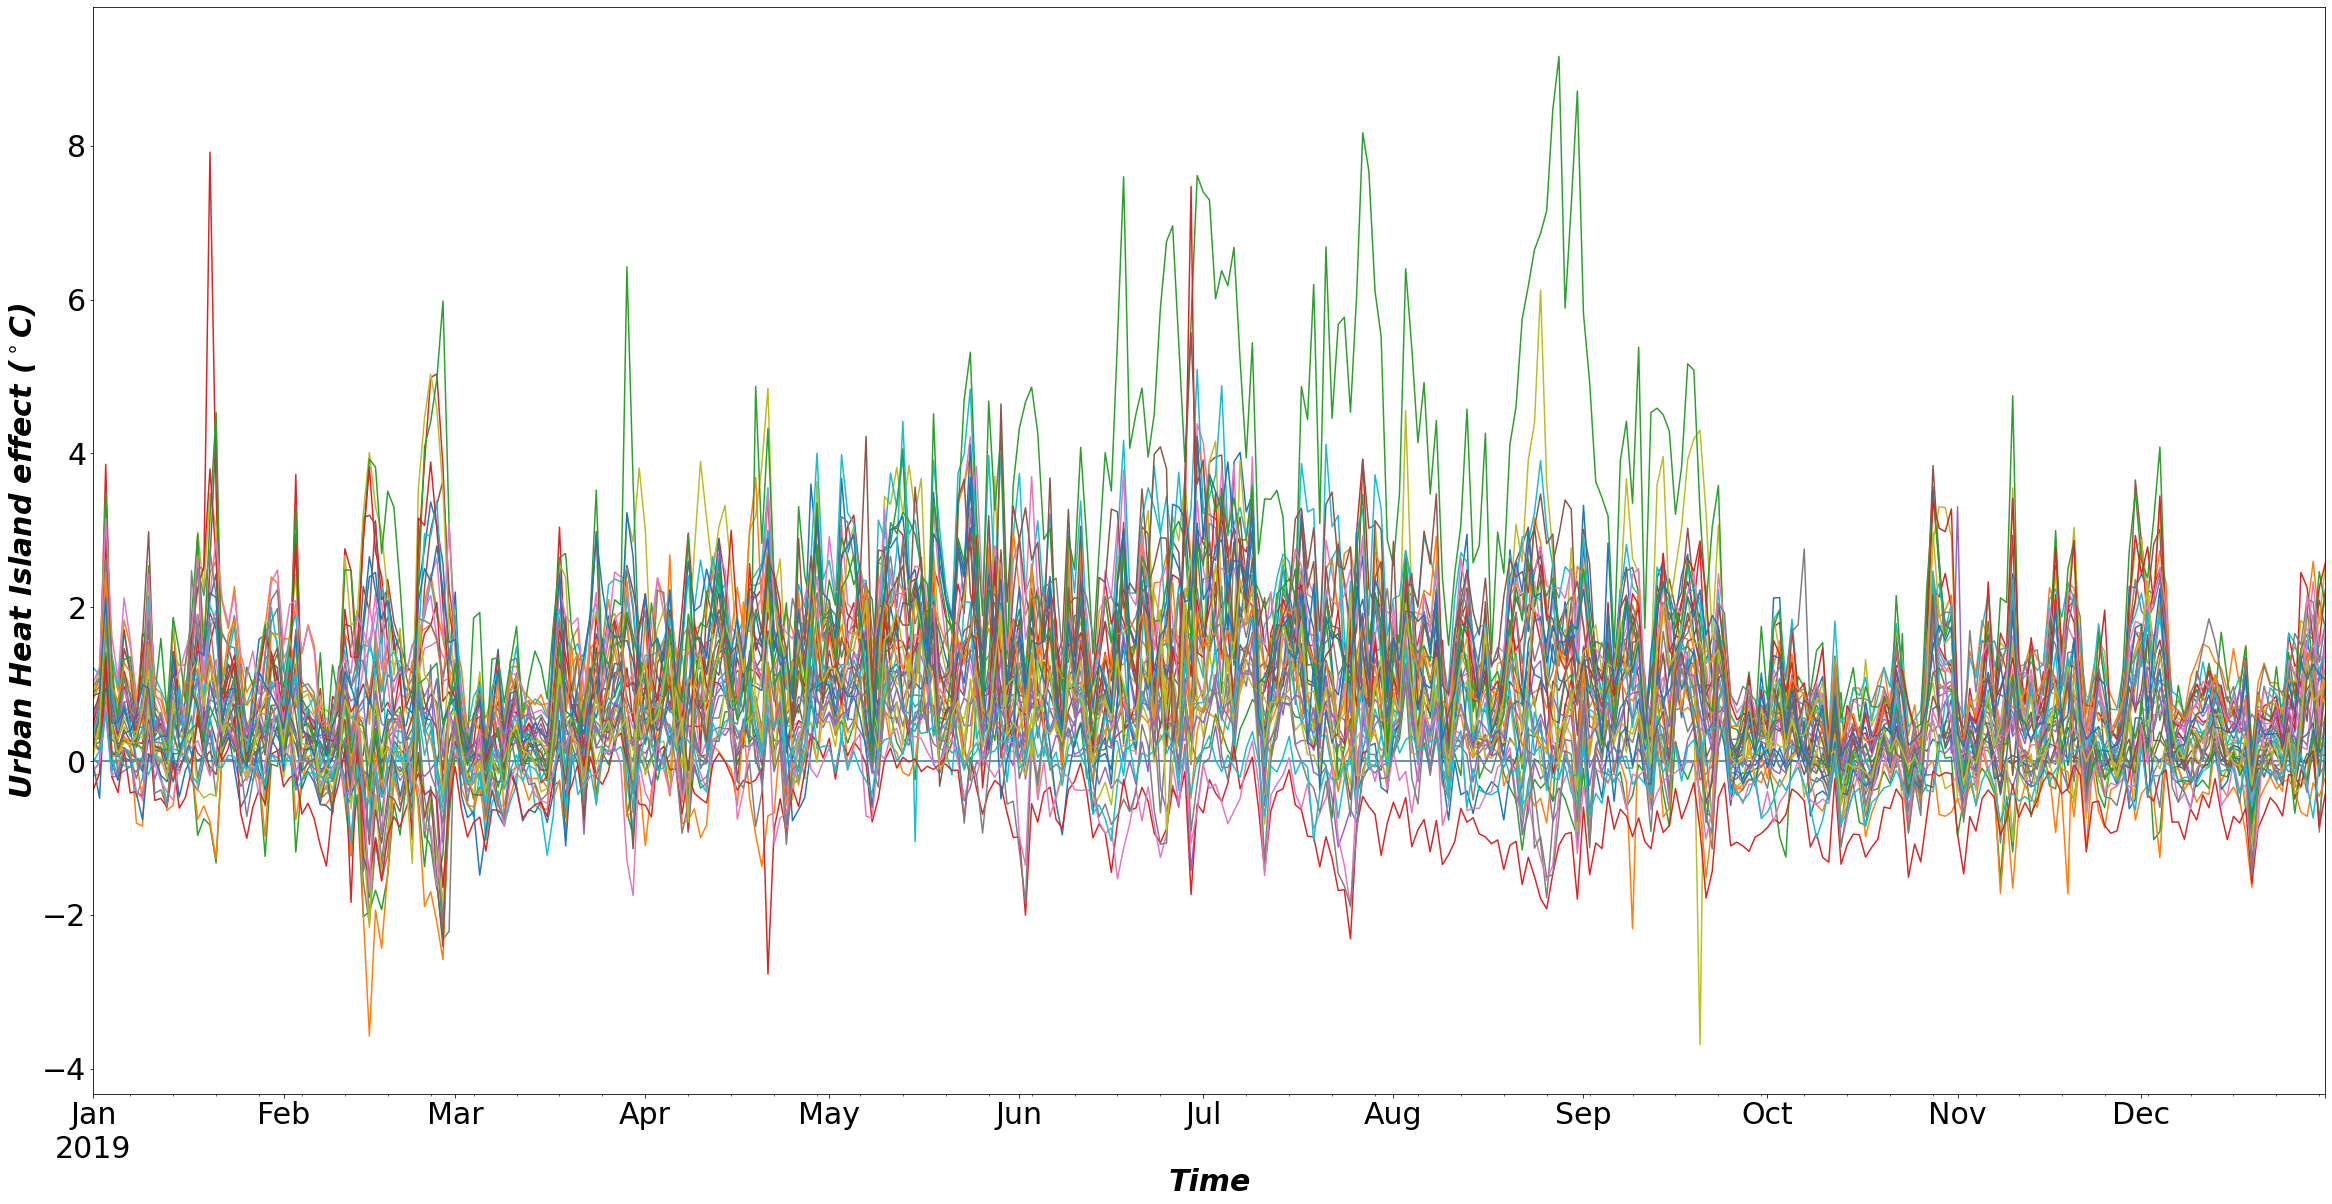

In [87]:
#plotting the daily average UHI 
fig, ax = plt.subplots(figsize=(40,20))
groupeddaily.plot(x='time',y='uhimeandaily',ax=ax,legend=False)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Time',fontsize=30, weight='bold', fontstyle='oblique')
plt.ylabel('Urban Heat Island effect ($^\circ$C)', fontsize=30, weight='bold', fontstyle='oblique')

In [102]:
dailydata.to_csv(os.getcwd() + "\datacleaned2019uhidaily.csv")